# Forest Fire Detection

In this project we are using a set of images (some with forest fire in them and the others without forest fire) to train various ML models like CNN, random forest, SVM and Naive Bayes. We also check the predictions and accuracy of the models.

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [4]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

In [5]:
#importing dataset
train_dataset = train.flow_from_directory("Desktop/forest_fire/Training and Validation/",target_size=(150,150), batch_size = 32, class_mode = 'binary')
test_dataset = test.flow_from_directory("Desktop/forest_fire/Testing/", target_size = (150,150), batch_size = 32, class_mode = 'binary')

Found 1832 images belonging to 2 classes.
Found 68 images belonging to 2 classes.


In [6]:
test_dataset.class_indices

{'fire': 0, 'nofire': 1}

# CNN model

In [7]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32,
                              (3,3),
                              activation='relu',
                              input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64,
                              (3,3),
                              activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,
                              (3,3),
                              activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,
                              (3,3),
                              activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [8]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [9]:
CNN_Model = model.fit(train_dataset, epochs = 20, validation_data = test_dataset)

Epoch 1/20
58/58 [==============================] - 39s 652ms/step - loss: 0.3119 - accuracy: 0.8739 - val_loss: 0.2402 - val_accuracy: 0.9265
Epoch 2/20
58/58 [==============================] - 53s 909ms/step - loss: 0.1768 - accuracy: 0.9394 - val_loss: 0.3931 - val_accuracy: 0.8235
Epoch 3/20
58/58 [==============================] - 54s 929ms/step - loss: 0.1204 - accuracy: 0.9618 - val_loss: 0.2655 - val_accuracy: 0.9265
Epoch 4/20
58/58 [==============================] - 67s 1s/step - loss: 0.1292 - accuracy: 0.9558 - val_loss: 0.2460 - val_accuracy: 0.9118
Epoch 5/20
58/58 [==============================] - 55s 940ms/step - loss: 0.1137 - accuracy: 0.9602 - val_loss: 0.4307 - val_accuracy: 0.8235
Epoch 6/20
58/58 [==============================] - 57s 973ms/step - loss: 0.0798 - accuracy: 0.9738 - val_loss: 0.1157 - val_accuracy: 0.9412
Epoch 7/20
58/58 [==============================] - 47s 813ms/step - loss: 0.0569 - accuracy: 0.9809 - val_loss: 0.1167 - val_accuracy: 0.9559
Ep

In [10]:
loss, accuracy = model.evaluate(test_dataset)

# Print the accuracy
print("Accuracy: " + str(accuracy))
# Print the loss
print("Loss: " + str(loss))

3/3 [==============================] - 0s 96ms/step - loss: 0.2828 - accuracy: 0.9853
Accuracy: 0.9852941036224365
Loss: 0.28278106451034546


In [11]:
prediction = model.predict(test_dataset)
print('Length :', len(prediction))

3/3 [==============================] - 1s 81ms/step
Length : 68


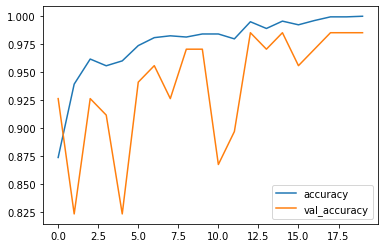

In [12]:
plt.plot(CNN_Model.history['accuracy'], label='accuracy')
plt.plot(CNN_Model.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [13]:
def predictImage(filename):
    img = image.load_img(filename,target_size=(150,150))
    plt.imshow(img)
    Y = image.img_to_array(img)
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    if val == 1:
        plt.xlabel("No Fire",fontsize=30)
    elif val == 0:
        plt.xlabel("Fire",fontsize=30)

1/1 [==============================] - 0s 194ms/step


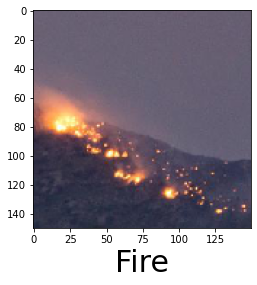

In [15]:
predictImage("Desktop/forest_fire/Testing/fire/abc175.jpg")

1/1 [==============================] - 0s 26ms/step


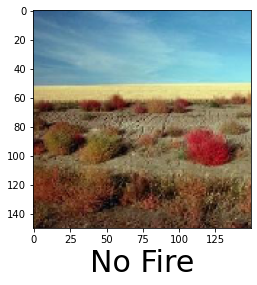

In [16]:
predictImage("Desktop/forest_fire/Testing/nofire/abc350.jpg")

1/1 [==============================] - 0s 262ms/step


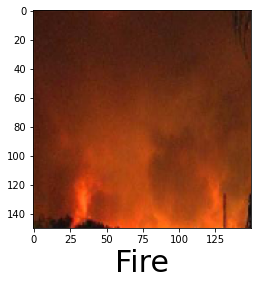

In [32]:
predictImage("Desktop/forest_fire/Testing/fire/abc187.jpg")

# Random Forest Classifier

In [34]:
Train = "Desktop/forest_fire/Training and Validation"
Test = "Desktop/forest_fire/Testing"

In [39]:
from tqdm import tqdm
import sklearn
import skimage
from skimage.transform import resize
import random
from sklearn.metrics import accuracy_score
import seaborn as sns
sns.set()

In [77]:
LOAD_FROM_IMAGES = True
def get_data(folder):
    x = []
    y = []
    for folderName in os.listdir(folder):
        if not folderName.startswith("."):
            if folderName in ["nofire"]:
                label = 0
            elif folderName in ["fire"]:
                label = 1
            else:
                label = 2
            for image_filename in tqdm(os.listdir(folder +"/" +folderName+"/")):
                img_file = cv2.imread(folder + "/" +folderName + "/" + image_filename)
                if img_file is not None:
                    img_file = skimage.transform.resize(img_file,(227,227,3), mode = "constant",anti_aliasing=True)
                    img_arr = np.asarray(img_file)
                    x.append(img_arr)
                    y.append(label)
    x = np.asarray(x)
    y = np.asarray(y)
    return x,y

if LOAD_FROM_IMAGES:
    X_train,y_train = get_data(Train)
    X_test, y_test = get_data(Test)
    
    np.save("xtrain.npy",X_train)
    np.save("ytrain.npy",y_train)
    np.save("xtest.npy",X_test)
    np.save("ytest.npy",y_test)
else:
    X_train = np.load("xtrain.npy")
    y_train = np.load("ytrain.npy")
    X_test = np.load("xtest.npy")
    y_test = np.load("ytest.npy")

X_train, X_test = X_train / 255.0, X_test / 255.0

100%|██████████| 46/46 [00:00<00:00, 66.60it/s]


In [78]:
X_train.shape

(1832, 227, 227, 3)

In [79]:
a,b,c,d = X_train.shape

In [80]:
A,B,C,D = X_test.shape
X_test = X_test.reshape(-1, B*C*D)

In [81]:
X_train = X_train.reshape(-1, b*c*d)

In [82]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=50)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [91]:
print("Random forest model accuracy:", model.score(X_test, y_test)*100)

Random forest model accuracy: 88.23529411764706


In [61]:
y_predicted= model.predict(X_test)

# Naive Bayes Classifier

In [84]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [85]:
y_pred = gnb.predict(X_test)

In [86]:
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 83.82352941176471


# SVM algorithm

In [87]:
from sklearn.svm import SVC

In [88]:
Modelsvm = SVC(C=10, gamma =10)

In [89]:
Modelsvm.fit(X_train, y_train)

SVC(C=10, gamma=10)

In [92]:
print( "SVM model accuracy:", Modelsvm.score(X_test,y_test)*100)

SVM model accuracy: 94.11764705882352
